<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/tf2_cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Install Tensorflow
# !pip install -q tensorflow-gpu==2.0.0-beta1
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.0.0-beta1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [50]:
# load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [51]:
# the data is only 2D
# convolution expects (height * witdh * color) shape
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [52]:
K = len(set(y_train))
print("numbrt of classes:", K)

numbrt of classes: 10


In [53]:
# build the model
# i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2 , activation="relu")(i)
# x = Conv2D(64, (3, 3), strides=2 , activation="relu")(x)
# x = Conv2D(128, (3, 3), strides=2 , activation="relu")(x)
# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(512, activation="relu")(x)
# x = Dropout(0.5)(x)
# x = Dense(K, activation="softmax")(x)

# model = Model(i, x)
i = Input(shape=x_train[0].shape)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last', input_shape=(28,28,1))(i)
x = BatchNormalization()(x)
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)
print(model.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_22 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 64)        1849

In [54]:
# compile and fit
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 29s 485us/sample - loss: 0.4576 - accuracy: 0.8396 - val_loss: 0.3121 - val_accuracy: 0.8861
Epoch 2/15
60000/60000 [==============================] - 28s 468us/sample - loss: 0.3074 - accuracy: 0.8924 - val_loss: 0.2626 - val_accuracy: 0.9046
Epoch 3/15
60000/60000 [==============================] - 28s 467us/sample - loss: 0.2687 - accuracy: 0.9048 - val_loss: 0.2682 - val_accuracy: 0.9037
Epoch 4/15
60000/60000 [==============================] - 28s 467us/sample - loss: 0.2384 - accuracy: 0.9157 - val_loss: 0.2127 - val_accuracy: 0.9238
Epoch 5/15
60000/60000 [==============================] - 28s 464us/sample - loss: 0.2187 - accuracy: 0.9215 - val_loss: 0.2115 - val_accuracy: 0.9233
Epoch 6/15
60000/60000 [==============================] - 28s 465us/sample - loss: 0.2005 - accuracy: 0.9282 - val_loss: 0.1990 - val_accuracy: 0.9280
Epoch 7/15
60000/60000 [====================

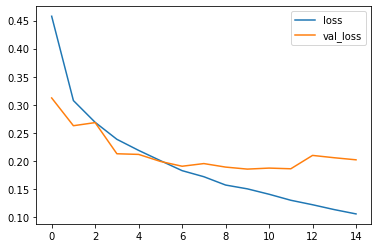

In [55]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

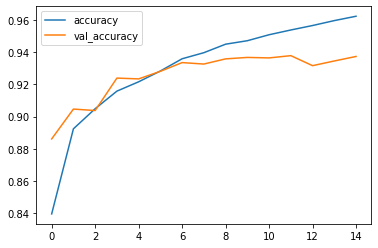

In [56]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

Confusion matrix, without normalization
[[895   0  22  13   2   1  62   0   5   0]
 [  1 989   0   6   1   0   2   0   1   0]
 [ 11   1 923   5  30   0  30   0   0   0]
 [  8   1   7 949  19   0  15   0   0   1]
 [  0   0  35  23 911   0  31   0   0   0]
 [  0   0   0   0   0 987   0   9   0   4]
 [ 95   0  47  20  52   0 783   0   3   0]
 [  0   0   0   0   0   4   0 985   0  11]
 [  2   0   0   4   1   1   1   1 990   0]
 [  0   0   0   0   0   3   1  36   0 960]]


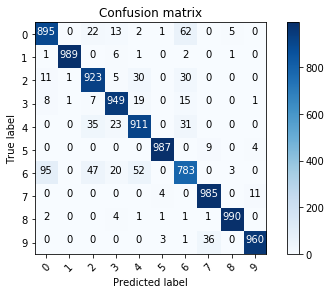

In [57]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

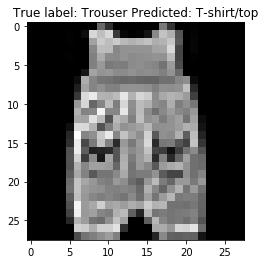

In [67]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));